## 1. Image Data Handling

In [6]:
# import necessary libraries for plotting images
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
# plot in jupyter notebook itself
%matplotlib inline

In [9]:
# read an image
img = plt.imread('../datasets/emergency_classification/images/0.jpg')

In [10]:
# print image
img

array([[[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 70,  81,  87],
        [ 74,  85,  91],
        [ 82,  93,  99]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 82,  93,  99],
        [ 82,  93,  99],
        [ 83,  94, 100]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 77,  88,  94],
        [ 75,  86,  92],
        [ 76,  87,  93]],

       ...,

       [[ 39,  39,  37],
        [ 36,  36,  34],
        [ 35,  35,  33],
        ...,
        [ 42,  41,  39],
        [ 45,  44,  42],
        [ 43,  42,  40]],

       [[ 38,  38,  36],
        [ 37,  37,  35],
        [ 36,  36,  34],
        ...,
        [ 45,  44,  42],
        [ 43,  42,  40],
        [ 34,  33,  31]],

       [[ 33,  33,  31],
        [ 33,  33,  31],
        [ 32,  32,  30],
        ...,
        [ 43,  42,  40],
        [ 34,  33,  31],
        [ 20,  19,  17]]

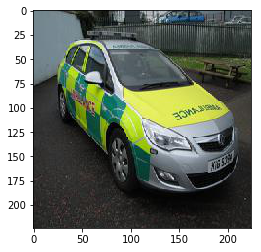

In [11]:
# plot image
plt.imshow(img)

In [12]:
# display image shape
img.shape

(224, 224, 3)

In [13]:
# display a pixel
img[0, 0]

array([115, 134, 141], dtype=uint8)

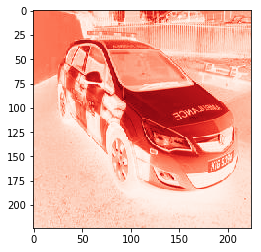

In [14]:
# show red channel
plt.imshow(img[:, :, 0], cmap='Reds') 

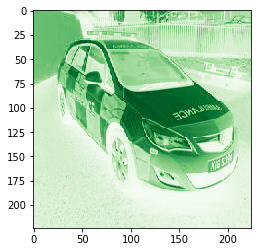

In [15]:
# show green channel
plt.imshow(img[:, :, 1], cmap='Greens')

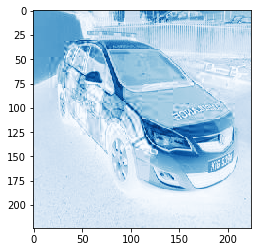

In [16]:
# show blue channel
plt.imshow(img[:, :, 2], cmap='Blues')

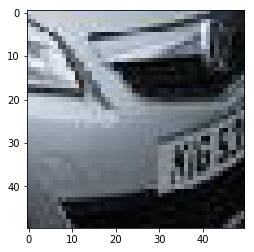

In [17]:
# extract part of image
patch = img[125:175 , 150:200]


# plot part of image
plt.imshow(patch)

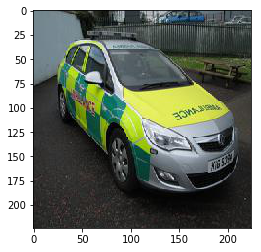

In [18]:
# plot image
plt.imshow(img)

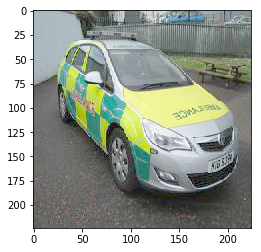

In [19]:
# load library
from skimage.exposure import adjust_gamma

# increase brightness
plt.imshow(adjust_gamma(img, 0.5))

## 2. Data Exploration

In [20]:
from glob import glob

In [21]:
images = glob('../datasets/emergency_classification/images/*.jpg')

In [22]:
images

['../datasets/emergency_classification/images/1770.jpg',
 '../datasets/emergency_classification/images/1314.jpg',
 '../datasets/emergency_classification/images/341.jpg',
 '../datasets/emergency_classification/images/1995.jpg',
 '../datasets/emergency_classification/images/951.jpg',
 '../datasets/emergency_classification/images/1082.jpg',
 '../datasets/emergency_classification/images/1278.jpg',
 '../datasets/emergency_classification/images/2087.jpg',
 '../datasets/emergency_classification/images/1943.jpg',
 '../datasets/emergency_classification/images/1391.jpg',
 '../datasets/emergency_classification/images/906.jpg',
 '../datasets/emergency_classification/images/853.jpg',
 '../datasets/emergency_classification/images/111.jpg',
 '../datasets/emergency_classification/images/1515.jpg',
 '../datasets/emergency_classification/images/1031.jpg',
 '../datasets/emergency_classification/images/1495.jpg',
 '../datasets/emergency_classification/images/914.jpg',
 '../datasets/emergency_classificatio

In [23]:
# To stop potential randomnes
rng = np.random.RandomState()

In [24]:
img_name = rng.choice(images)
img_name

'../datasets/emergency_classification/images/1511.jpg'

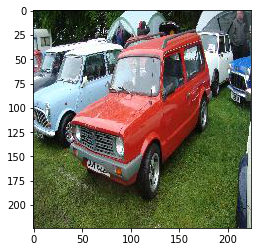

In [25]:
img_name = rng.choice(images)

img = plt.imread(img_name)

plt.imshow(img)

In [26]:
import pandas as pd

In [27]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [28]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [29]:
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [30]:
# Randomly select a row from our data
# Pick out the name of the image
# Read and plot the image
# Pick out the class from the target for the corresponding image
# Print class of the vehicle

It is NOT an emergency vehicle


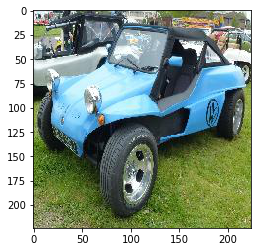

In [31]:
# Randomly select a row from our data
row_index = rng.choice(data.index)

# Pick out name of the image
img_name = data.iloc[row_index]['image_names']

# Read and plot the image
img = plt.imread('../datasets/emergency_classification/images/' + img_name)
plt.imshow(img)

# Pick out class from the target for the corresponding image
target = data.iloc[row_index]['emergency_or_not']

# Print class of the vehicle
if target == 1:
    print('It is an emergency vehicle')
else:
    print('It is NOT an emergency vehicle')

## 3. Data Loading and Preprocessing

### Model Training Process

<img src="images/model.png" alt="drawing" style="width:500px;" align="left"/>

### Stack Images one over the other

<img src="images/book_stack.jpg" alt="drawing" style="width:500px;" align="left"/>

In [32]:
# create an empty python list
X = []

# go through all the image locations one by one
for img_name in data.image_names:
    # read the image from location
    img = plt.imread('../datasets/emergency_classification/images/' + img_name)
    # pile it one over the other
    X.append(img)
    
# convert this python list to a single numpy array
X = np.array(X)

In [33]:
X.shape

(2352, 224, 224, 3)

In [34]:
y = data.emergency_or_not.values

In [35]:
y.shape

(2352,)

In [36]:
X

array([[[[115, 134, 141],
         [116, 135, 142],
         [116, 135, 142],
         ...,
         [ 70,  81,  87],
         [ 74,  85,  91],
         [ 82,  93,  99]],

        [[115, 134, 141],
         [116, 135, 142],
         [116, 135, 142],
         ...,
         [ 82,  93,  99],
         [ 82,  93,  99],
         [ 83,  94, 100]],

        [[115, 134, 141],
         [116, 135, 142],
         [116, 135, 142],
         ...,
         [ 77,  88,  94],
         [ 75,  86,  92],
         [ 76,  87,  93]],

        ...,

        [[ 39,  39,  37],
         [ 36,  36,  34],
         [ 35,  35,  33],
         ...,
         [ 42,  41,  39],
         [ 45,  44,  42],
         [ 43,  42,  40]],

        [[ 38,  38,  36],
         [ 37,  37,  35],
         [ 36,  36,  34],
         ...,
         [ 45,  44,  42],
         [ 43,  42,  40],
         [ 34,  33,  31]],

        [[ 33,  33,  31],
         [ 33,  33,  31],
         [ 32,  32,  30],
         ...,
         [ 43,  42,  40],
        

In [37]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [38]:
X.min(), X.max()

(0, 255)

In [39]:
from keras.applications.vgg16 import preprocess_input

In [40]:
X = preprocess_input(X, mode='tf')

In [41]:
X.min(), X.max()

(-1.0, 1.0)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Model Building


1. Load data (done)
2. Pre-Process it (done)
3. Load weights of pre-trained model
4. Finetune model for the current problem
5. Validate if it works fine, iterate again if it does not

<tr>
    <td><img src="images/imagenet_challenge.png" alt="drawing" style="width:500px;" align="left"/></td>
    <td><img src="images/screenshot.png" alt="drawing" style="width:500px;" align="left"/></td>
</tr>


[Source](https://www.slideshare.net/xavigiro/image-classification-on-imagenet-d1l4-2017-upc-deep-learning-for-computer-vision/)

In [47]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, InputLayer

In [48]:
base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False, pooling='avg')

In [49]:
for layer in base_model.layers:
    layer.Trainable = False

In [50]:
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dense(1, activation=sigmoid))

In [51]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 14,717,249
Trainable params: 14,716,225
Non-trainable params: 1,024
_________________________________________________________________


In [53]:
model.fit(X_train, Y_train, epochs=3, validation_data=(X_valid, Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/3
1646/1646 [==============================] - 32s 19ms/step - loss: 0.2839 - acc: 0.8755 - val_loss: 0.2886 - val_acc: 0.8754
Epoch 2/3
1646/1646 [==============================] - 14s 9ms/step - loss: 0.1162 - acc: 0.9629 - val_loss: 0.2052 - val_acc: 0.9235
Epoch 3/3
1646/1646 [==============================] - 14s 9ms/step - loss: 0.0618 - acc: 0.9854 - val_loss: 0.2035 - val_acc: 0.9093


In [72]:
predictions = model.predict_classes(X_valid)
predictions

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [73]:
prediction_probabilities = model.predict(X_valid)
prediction_probabilities

array([[2.97148943e-01],
       [9.78017449e-01],
       [1.59416609e-02],
       [9.99415398e-01],
       [5.25998697e-03],
       [9.99880672e-01],
       [2.13376641e-01],
       [9.99954581e-01],
       [6.14946038e-02],
       [7.31268466e-01],
       [1.17144985e-02],
       [1.30466325e-02],
       [2.48634946e-02],
       [1.58387353e-03],
       [1.93483569e-02],
       [9.99995589e-01],
       [2.59474199e-02],
       [9.89090025e-01],
       [9.99466717e-01],
       [9.98736799e-01],
       [9.99989867e-01],
       [3.54193598e-02],
       [4.39199239e-01],
       [9.37599037e-03],
       [2.59464066e-02],
       [1.73327759e-01],
       [9.95866060e-01],
       [5.75488843e-02],
       [1.07794993e-01],
       [9.76253092e-01],
       [9.99458492e-01],
       [3.31006460e-02],
       [8.69422674e-01],
       [3.98645028e-02],
       [9.79398005e-03],
       [6.39251433e-03],
       [4.59836870e-01],
       [9.99989390e-01],
       [1.33336291e-01],
       [2.09370758e-02],


In [ ]:
# pull out the original images from the data
## which correspond to the validation data
# get a random index to plot image randomly
# get the corresponding image name and probability
# read the image
# print probability and actual class
# plot image

In [ ]:
# pull out the original images from the data
# which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=42)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('../datasets/emergency_classification/images/' + img_name)

# print probability and actual class
print(prob , '% sure that it is emergency')
print('Whereas actual class is ', Y_valid[index])

# plot image
plt.imshow(img)

plt.show()

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 14,717,249
Trainable params: 14,716,225
Non-trainable params: 1,024
_________________________________________________________________


In [70]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [1]:
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
from keras.layers import Dense, Conv2D

model = Sequential()
model.add(Dense(units=1))

In [5]:
from keras.activations import sigmoid, tanh

model = Sequential()
model.add(Dense(1, activation=sigmoid))

In [57]:
from keras.optimizers import SGD, Adam

sgd = SGD(lr=0.01)

model = Sequential()
model.add(Dense(1, activation=sigmoid))

model.compile(optimizer=sgd)

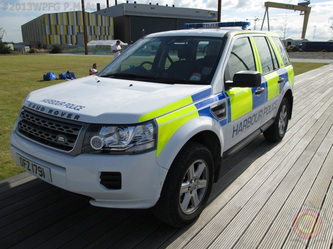

In [61]:
from keras.preprocessing import image

image.load_img('images/emergency_1000.jpg')

In [64]:
from keras.applications import vgg16

model = vgg16.VGG16(weights='imagenet')

553467904/553467096 [==============================] - 112s 0us/step
